### Алгоритм наивного байесовского классификатора

В основе наивного байесовского классификатора лежит теорема Байеса. В данном случае, мы классифицируем объекты на два класса: $y = -1$ и $y = +1$. Признаки векторов $x = [x_1, x_2]^T$ считаются статистически независимыми и распределенными по нормальному закону.

**Общая формула плотности вероятности нормального распределения (Гаусса)** для одной случайной величины $x$ с математическим ожиданием $\mu$ и дисперсией $\sigma^2$ выглядит следующим образом:

$$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

Поскольку признаки $x_1$ и $x_2$ считаются статистически независимыми, условная вероятность $p(x | y)$ может быть представлена как произведение условных вероятностей каждого признака, где каждый признак $x_i$ распределен нормально:
$$p(x | y) = p(x_1 | y) \cdot p(x_2 | y)$$

#### Условные вероятности признаков

Применяя формулу нормального распределения к каждому признаку, получаем:

**Для класса $y = -1$**: Условная вероятность $p(x | y = -1)$ рассчитывается как произведение вероятностей отдельных признаков, предполагая их независимость и нормальное распределение:

$$p(x_i | y = -1) = \frac{1}{2\pi \cdot \sqrt{D_1^{(-1)} \cdot D_2^{(-1)}}} \cdot exp\left(-\frac{(x_1 - m_{x1}^{(-1)})^2}{2D_1^{(-1)}} - \frac{(x_2 - m_{x2}^{(-1)})^2}{2D_2^{(-1)}}\right)$$

Где:
- $m_{x1}^{(-1)}, m_{x2}^{(-1)}$ — математические ожидания для признаков $x_1, x_2$ класса $y = -1$.
- $D_1^{(-1)}, D_2^{(-1)}$ — дисперсии признаков $x_1, x_2$ класса $y = -1$.

**Для класса $y = +1$**: Аналогично, условная вероятность $p(x | y = +1)$, также основанная на предположении о нормальном распределении и независимости признаков:

$$p(x_i | y = +1) = \frac{1}{2\pi \cdot \sqrt{D_1^{(+1)} \cdot D_2^{(+1)}}} \cdot exp\left(-\frac{(x_1 - m_{x1}^{(+1)})^2}{2D_1^{(+1)}} - \frac{(x_2 - m_{x2}^{(+1)})^2}{2D_2^{(+1)}}\right)$$

Где:
- $m_{x1}^{(+1)}, m_{x2}^{(+1)}$ — математические ожидания для признаков $x_1, x_2$ класса $y = +1$.
- $D_1^{(+1)}, D_2^{(+1)}$ — дисперсии признаков $x_1, x_2$ класса $y = +1$.

#### Классификация

Цель классификации — найти класс $y$, который максимизирует апостериорную вероятность $P(y|x)$. Согласно теореме Байеса, эта вероятность выражается как:

$$P(y|x) = \frac{p(x|y)P(y)}{p(x)}$$

При наличии штрафов за неверную классификацию ($\lambda_y$), правило классификации модифицируется для максимизации взвешенной апостериорной вероятности. Таким образом, мы выбираем класс $y$, который максимизирует произведение $\lambda_y \cdot P(y|x)$. Подставляя формулу Байеса, получаем:

$\operatorname{argmax}_{y \in Y} (\lambda_y \cdot \frac{p(x|y)P(y)}{p(x)})$

Поскольку $p(x)$ (вероятность наблюдения признаков $x$) является константой для всех классов $y$ и не влияет на выбор класса с максимальной вероятностью, мы можем исключить ее из максимизации. Таким образом, правило упрощается до:

$$\operatorname{argmax}_{y \in Y} (\lambda_y \cdot p(x|y)P(y))$$

Для удобства вычислений и предотвращения возникновения очень малых чисел (что может привести к ошибкам округления), обычно используется логарифм этого выражения, так как функция логарифма является монотонно возрастающей и не изменяет положение максимума:

$$a(x) = \operatorname{argmax}_{y \in Y} (\ln(\lambda_y \cdot P_y) + \ln(p(x | y)))$$

Где:
- $Y$ — множество всех классов (в данном случае, $Y = \{-1, +1\}$).
- $\lambda_y$ — штраф за неверную классификацию класса $y$.
- $P_y$ — априорная вероятность появления образов класса $y$.
- $p(x | y)$ — условная вероятность признаков $x$ при условии принадлежности к классу $y$, рассчитанная по формулам выше.

На практике, для каждого объекта $x$ вычисляются значения логарифмических функций для каждого класса, и объект относится к тому классу, для которого это значение максимально.

#### Оценка качества классификатора

Для оценки качества классификации используется показатель $Q$, который представляет собой долю неверно классифицированных объектов:

$$Q(a,X) = \frac{1}{n} \sum_{i=1}^{n} [a(x_i) \neq y_i]$$

где:
- $n$ — общее количество объектов в выборке.
- $a(x_i)$ — предсказанный класс для объекта $x_i$.
- $y_i$ — истинный класс объекта $x_i$.
- $[\cdot]$ — скобки Айверсона, означающие, что выражение равно 1, если условие внутри истинно, и 0 в противном случае.

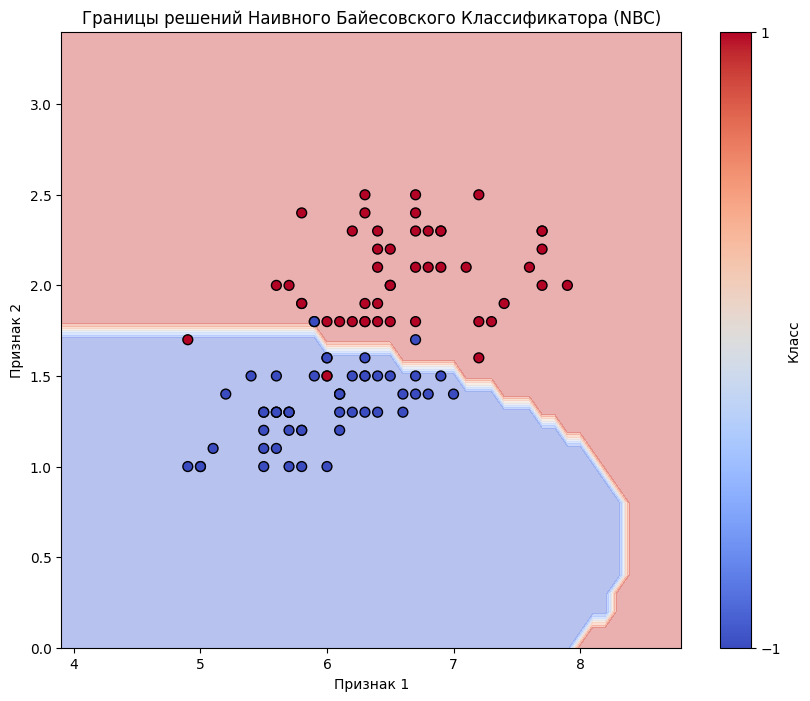

In [4]:
import numpy as np

data_x = [(7.2, 2.5), (6.4, 2.2), (6.3, 1.5), (7.7, 2.2), (6.2, 1.8), (5.7, 1.3), (7.1, 2.1), (5.8, 2.4), (5.2, 1.4), (5.9, 1.5), (7.0, 1.4), (6.8, 2.1), (7.2, 1.6), (6.7, 2.4), (6.0, 1.5), (5.1, 1.1), (6.6, 1.3), (6.1, 1.4), (6.7, 2.1), (6.4, 1.8), (5.6, 1.3), (6.9, 2.3), (6.4, 1.9), (6.9, 2.3), (6.5, 2.2), (6.0, 1.5), (5.6, 1.1), (5.6, 1.5), (6.0, 1.0), (6.0, 1.8), (6.7, 2.5), (7.7, 2.3), (5.5, 1.1), (5.8, 1.0), (6.9, 2.1), (6.6, 1.4), (6.3, 1.6), (6.1, 1.4), (5.0, 1.0), (7.7, 2.0), (4.9, 1.7), (7.2, 1.8), (6.8, 1.4), (6.1, 1.2), (5.8, 1.9), (6.3, 2.5), (5.7, 2.0), (6.5, 1.8), (7.6, 2.1), (6.3, 1.5), (6.7, 1.4), (6.4, 2.3), (6.2, 2.3), (6.3, 1.9), (5.5, 1.3), (7.9, 2.0), (6.7, 1.8), (6.4, 1.3), (6.5, 2.0), (6.5, 1.5), (6.9, 1.5), (5.6, 1.3), (5.8, 1.2), (6.7, 2.3), (6.0, 1.6), (5.7, 1.2), (5.7, 1.0), (5.5, 1.0), (6.1, 1.4), (6.3, 1.8), (5.7, 1.3), (6.1, 1.3), (5.5, 1.3), (6.3, 1.3), (5.9, 1.8), (7.7, 2.3), (6.5, 2.0), (5.6, 2.0), (6.7, 1.7), (5.7, 1.3), (5.5, 1.2), (5.0, 1.0), (5.8, 1.9), (6.2, 1.3), (6.2, 1.5), (6.3, 2.4), (6.4, 1.5), (7.4, 1.9), (6.8, 2.3), (5.6, 1.3), (5.8, 1.2), (7.3, 1.8), (6.7, 1.5), (6.3, 1.8), (6.0, 1.6), (6.4, 2.1), (6.1, 1.8), (5.9, 1.8), (5.4, 1.5), (4.9, 1.0)]
data_y = [1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1]

x_train = np.array(data_x)
y_train = np.array(data_y)

# математические ожидания
mx11, mx12 = np.mean(x_train[y_train == -1], axis=0)
mx21, mx22 = np.mean(x_train[y_train == 1], axis=0)

# дисперсии
Dx11, Dx12 = np.var(x_train[y_train == -1], axis=0)
Dx21, Dx22 = np.var(x_train[y_train == 1], axis=0)

lm1 = 1     # штраф неверной классификации 1-го класса (-1)
lm2 = 1     # штраф неверной классификации 2-го класса (+1)
P1 = 0.5    # априорная вероятность появления образов 1-го класса
P2 = 1 - P1 # априорная вероятность появления образов 2-го класса

# здесь продолжайте программу
p_1 = lambda x1,x2: (1 / (2*np.pi * np.sqrt(Dx11 * Dx12))) * np.exp(-((x1 - mx11)**2/(2*Dx11)) - ((x2 - mx12)**2/(2*Dx12)))
p_2 = lambda x1,x2: (1 / (2*np.pi * np.sqrt(Dx21 * Dx22))) * np.exp(-((x1 - mx21)**2/(2*Dx21)) - ((x2 - mx22)**2/(2*Dx22)))

predict = []
for x1,x2 in x_train:
    a_1 = np.log(lm1*P1) + np.log(p_1(x1,x2))
    a_2 = np.log(lm2*P2) + np.log(p_2(x1,x2))
    predict.append(np.argmax([a_1,a_2])*2 - 1)
pred = np.array(predict)
Q = np.mean(pred != y_train)
import matplotlib.pyplot as plt

# Определим границы для построения сетки
x1_min_nbc, x1_max_nbc = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
x2_min_nbc, x2_max_nbc = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

# Создадим сетку
xx1_nbc, xx2_nbc = np.meshgrid(np.arange(x1_min_nbc, x1_max_nbc, 0.1),
                               np.arange(x2_min_nbc, x2_max_nbc, 0.1))

# Функция для классификации одной точки с использованием логики NBC
def classify_point_nbc(x_point):
    x1_val, x2_val = x_point[0], x_point[1]
    a_1 = np.log(lm1*P1) + np.log(p_1(x1_val,x2_val))
    a_2 = np.log(lm2*P2) + np.log(p_2(x1_val,x2_val))
    return np.argmax([a_1,a_2])*2 - 1

# Классифицируем каждую точку в сетке
Z_nbc = np.array([classify_point_nbc(np.array([x1_val, x2_val])) for x1_val, x2_val in np.c_[xx1_nbc.ravel(), xx2_nbc.ravel()]])
Z_nbc = Z_nbc.reshape(xx1_nbc.shape)

plt.figure(figsize=(10, 8))

# Отображаем области решений
plt.contourf(xx1_nbc, xx2_nbc, Z_nbc, alpha=0.4, cmap=plt.cm.coolwarm)

# Отображаем обучающие данные
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=50)

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Границы решений Наивного Байесовского Классификатора (NBC)')
plt.colorbar(ticks=[-1, 1], label='Класс')
plt.show()

### Алгоритм регрессии с использованием теоремы Байеса (метод максимального правдоподобия)

В задачах регрессии мы стремимся аппроксимировать неизвестную функцию $f(x)$ с помощью модели $a(x)$, параметры которой определяются на основе обучающих данных. В данном случае, функция имеет вид:

$$f(x) = 0.5 \cdot x + 0.2 \cdot x^2 - 0.05 \cdot x^3 + 0.2 \cdot \sin(4x) - 2.5$$

и аппроксимируется линейной моделью вида:

$$a(x) = w_0 + w_1 \cdot x + w_2 \cdot x^2 + w_3 \cdot x^3$$

Вектор параметров $w = [w_0, w_1, w_2, w_3]^T$ находится путем максимизации функции правдоподобия, что эквивалентно максимизации апостериорной вероятности $p(y|x,w)$ в рамках байесовского подхода:

$$w^* = \operatorname{argmax}_w p(y|x,w)$$

#### Вероятностная модель

Для простоты будем полагать, что отсчеты ${y_i}$ статистически независимы и подчиняются гауссовскому распределению (нормальной плотности распределения вероятностей - ПРВ). Плотность вероятности для одного наблюдения $y_i$ при заданных $x_i$ и $w$ имеет вид:

$$p(y_i|x_i,w) = \frac{1}{\sqrt{2\pi \cdot D_e}} \cdot \exp\left(-\frac{1}{2D_e} \cdot (y_i - w^T \cdot x_i)^2\right)$$

где:
- $x_i = [1, x_i, x_i^2, x_i^3]^T$ — вектор признаков $i$-го образа;
- $y_i$ — значение функции $f(x)$ в $i$-й точке;
- $D_e$ — дисперсия шума (предполагается постоянной для всех наблюдений).

Поскольку наблюдения ${y_i}$ считаются статистически независимыми, многомерная ПРВ вектора выходных значений $y$ от входных значений $x$ и $w$ записывается как произведение индивидуальных ПРВ:

$$p(y|x,w) = \prod_{i=1}^n p(y_i|x_i,w)$$

Подставляя выражение для $p(y_i|x_i,w)$, получаем:

$$p(y|x,w) = \frac{1}{(2\pi \cdot D_e)^{n/2}} \cdot \exp\left(-\frac{1}{2D_e} \cdot \sum_{i=1}^n (y_i - w^T \cdot x_i)^2\right)$$

#### Нахождение оптимального вектора параметров $w$

Для нахождения точки максимума $w^*$ ПРВ $p(y|x,w)$, удобно максимизировать её логарифм (поскольку логарифм — монотонно возрастающая функция, положение максимума не меняется). Сначала возьмём натуральный логарифм от $p(y|x,w)$:

$$\ln p(y|x,w) = \ln\left( \frac{1}{(2\pi \cdot D_e)^{n/2}} \right) - \frac{1}{2D_e} \cdot \sum_{i=1}^n (y_i - w^T \cdot x_i)^2$$

$$\ln p(y|x,w) = -\frac{n}{2}\ln(2\pi D_e) - \frac{1}{2D_e} \cdot \sum_{i=1}^n (y_i - w^T \cdot x_i)^2$$

Первый член ($-n/2 \ln(2\pi D_e)$) не зависит от $w$, поэтому для максимизации $\ln p(y|x,w)$ нам нужно минимизировать второй член, который представляет собой сумму квадратов ошибок. Это эквивалентно минимизации выражения:

$$\sum_{i=1}^n (y_i - w^T \cdot x_i)^2$$

что является **методом наименьших квадратов**. Чтобы найти $w^*$, мы берём производную логарифма по $w$ и приравниваем её к нулю:

$$\frac{\partial \ln p(y|x,w)}{\partial w} = \frac{1}{D_e} \cdot \sum_{i=1}^n (y_i - w^T \cdot x_i) \cdot x_i^T = 0$$

Это уравнение приводит к хорошо известному решению для метода наименьших квадратов:

$$w^* = (X^T X)^{-1} X^T y$$

где $X$ — матрица признаков, а $y$ — вектор целевых значений.

#### Оценка качества модели

Для оценки качества регрессионной модели обычно используется средний эмпирический риск (Mean Squared Error - MSE):

$$Q = \frac{1}{n} \sum_{i=1}^n (y_i - a(x_i))^2$$

In [3]:
#3.4.5

import numpy as np


def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


def model(w, x):
    return w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3


coord_x = np.arange(-4.0, 6.0, 0.1)

x_train = np.array([[_x**i for i in range(4)] for _x in coord_x]) # обучающая выборка
y_train = func(coord_x) # целевые выходные значения

# здесь продолжайте программу
w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

# Средний эмпирический риск
Q = np.mean((y_train - x_train @ w)**2)

w, Q


(array([-2.49213311,  0.50342222,  0.19781693, -0.04986103]),
 np.float64(0.0196629429495297))